# Twitter data wrangling

“Data wrangling—also called data cleaning, data remediation, or data munging—refers to a variety of processes designed to transform raw data into more readily used formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.”

                                                    -- Harvard Business Review

Source: https://online.hbs.edu/blog/post/data-wrangling 

# 1. Get the basic information

In [3]:
import pandas as pd

In [4]:
# read the Twitter data that we collected from last lecture
hurricane = pd.read_csv("hurricane_ian.csv", header = 0)
hurricane.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of ...,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0
1,Andrea Smith 🌊🐝🐶🐱🌱💙,dogparkgal,1509146276461531137,"Florida, USA",Starting over after a hack. Was @dogparkgoddes...,NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane I...,0,0
2,Sicilian-ShaSha 🇺🇸,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously don’t w...",0,1
3,Villain Character Development 🔜 Confuror 2022,KingOfFoxxes,1054890619867410433,"Baja California, México",| 21 Y.O | Mexican 🇲🇽 | Coffe Boi ☕️ | ♣️ Life...,NaN,270,1186,2018-10-24 00:21:37+00:00,Twitter for Android,2022-09-26 23:59:54+00:00,1574549355977023488,"RT @_chaibear: ppl really telling me to ""be ca...",0,1
4,James Cooper,stratosphere53,50626909,Atlanta,Air Force Brat / Vietnam veteran / Customer...,http://t.co/5gcImzgdlS,229,582,2009-06-25 12:06:55+00:00,Twitter Web App,2022-09-26 23:59:54+00:00,1574549355176001542,RT @stratosphere53: Canada counts damage after...,0,1


In [5]:
#check the basic information of this dataframe
hurricane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userName        1000 non-null   object
 1   screenName      1000 non-null   object
 2   userID          1000 non-null   int64 
 3   userLocation    686 non-null    object
 4   user_descrip    814 non-null    object
 5   user_url        294 non-null    object
 6   followers       1000 non-null   int64 
 7   friends         1000 non-null   int64 
 8   user_ctime      1000 non-null   object
 9   source          1000 non-null   object
 10  post_time       1000 non-null   object
 11  tweet_id        1000 non-null   int64 
 12  tweet_text      1000 non-null   object
 13  favorite_count  1000 non-null   int64 
 14  retweet_count   1000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 117.3+ KB


# 2. Find out some stories 

### How many users in this dataset?

In [6]:
# hint:count the number of unique values for screenName
len(hurricane['screenName'].unique())

903

### How many tweets per user?

In [7]:
Number_tweets= len(hurricane['tweet_text'].unique())
Number_users = len(hurricane['screenName'].unique())

round(float(Number_tweets/Number_users),3)

0.545

The ``float`` type in Python represents the floating point number. Float is used to represent real numbers and is written with a decimal point dividing the integer and fractional parts. 

### Who tweets the most?

In [8]:
# hint:count the frequency of each screenName
hurricane['screenName'].value_counts().head(5) # top 5 users who posts the most tweets for hurricane ian

RichFM39517086     8
roraimay1          5
BryanWinsAgain     5
jsalsman           4
BellaDonaModels    4
Name: screenName, dtype: int64

In [9]:
# Another way to count the frequency
from collections import Counter

screenames = Counter(hurricane['screenName'])
print(screenames.most_common(5))

[('RichFM39517086', 8), ('BryanWinsAgain', 5), ('roraimay1', 5), ('jsalsman', 4), ('BellaDonaModels', 4)]


In [10]:
# make it pretty
activetweeters = screenames.most_common(5)
activetweeters_df = pd.DataFrame(activetweeters, columns=["screenName","Frequency"])
activetweeters_df

,screenName,Frequency
0,RichFM39517086,8
1,BryanWinsAgain,5
2,roraimay1,5
3,jsalsman,4
4,BellaDonaModels,4


In [11]:
# what does the person who tweets the most say?
hurricane[hurricane['screenName']=='RichFM39517086']

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
77,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:59:06+00:00,1574549153761624064,RT @zoom_earth: #Ian is now a Category 1 Hurri...,0,17
95,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:58:58+00:00,1574549118684663808,RT @zoom_earth: ⚠️ Heavy rainfall from #Hurric...,0,50
839,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:51:28+00:00,1574547231109435393,RT @zoom_earth: Category 2 Hurricane #Ian sate...,0,12
841,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:51:26+00:00,1574547222045544449,RT @zoom_earth: Latest satellite view of Hurri...,0,10
845,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:51:23+00:00,1574547212603883520,RT @zoom_earth: Category 1 Hurricane #Ian near...,0,15
851,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:51:18+00:00,1574547190080770049,RT @zoom_earth: Today’s view of Tropical Storm...,0,9
854,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:51:16+00:00,1574547180916215808,RT @zoom_earth: Tropical Storm #Ian this morni...,0,20
995,WDON RADIO,RichFM39517086,1529421373,"Laguna Beach, Ca",WDON RADIO ~ # ROCK # BLUES # POP $ LEGENDARY ...,http://t.co/PVih046n9c,2821,5001,2013-06-19 01:58:01+00:00,Twitter Web App,2022-09-26 23:49:50+00:00,1574546821627711488,"Hurricane Ian: See latest forecast cone, spagh...",0,0


In [12]:
# display the full text information for this person's tweets
pd.set_option('display.max_colwidth', None)

In [13]:
Most_tweet =hurricane[hurricane['screenName']=='RichFM39517086']
Most_tweet['tweet_text']

77                                                               RT @zoom_earth: #Ian is now a Category 1 Hurricane 🌀 #HurricaneIan https://t.co/8n48e4aXST
95             RT @zoom_earth: ⚠️ Heavy rainfall from #HurricaneIan is forecast for western #Cuba and central #Florida. Life-threatening storm surge, hurr…
839             RT @zoom_earth: Category 2 Hurricane #Ian satellite view from today east of the Yucatán Peninsula. Forecast to intensify into a category 4…
841            RT @zoom_earth: Latest satellite view of Hurricane #Ian near the Cayman Islands. Maximum wind speeds over 80 mph. #HurricaneIan #HuracánIan…
845            RT @zoom_earth: Category 1 Hurricane #Ian near the Cayman Islands last night. Winds up to 75 mph. #HurricaneIan #HuracánIan https://t.co/Bo…
851            RT @zoom_earth: Today’s view of Tropical Storm #Ian in the Caribbean. This system may develop into a category 4 major hurricane. https://t.…
854            RT @zoom_earth: Tropical Storm #Ian this morning 

### Who is the most popular/ influencer/ has the most followers?

In [14]:
# hint: sort the number of followers by descending
hurricane['followers'].sort_values(ascending=False).head(5)

673    17707535
103     4848793
115     4848792
127     4848792
504     1046560
Name: followers, dtype: int64

In [15]:
# find this person using index
hurricane.iloc[[673]]

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
673,ABC News,ABC,28785486,New York City / Worldwide,"All the news and information you need to see, curated by the @ABC News team. Watch full ABC News broadcasts on @Hulu: https://t.co/w3wQ1O1Szs",https://t.co/26XEt8onYo,17707535,486,2009-04-04 12:40:32+00:00,SocialFlow,2022-09-26 23:53:25+00:00,1574547724074192896,The underwater geology of the Gulf of Mexico makes the Gulf Coast particularly unguarded against the massive influx of seawater. https://t.co/mcOuKS9Tfd,59,23


### Action 1: which tweet has been retweeted the most?

In [16]:
# hint: sort the number of retweet_count by descending 
# you probably will get many values have the same number of retweets
# hint: sort the number of followers by descending
hurricane['retweet_count'].sort_values(ascending=False).head(5)

999    7031
505    7031
436    7031
124    7031
445    7031
Name: retweet_count, dtype: int64

In [17]:
# find this tweet thread 
# check the tweets that have the same number of retweets, do they contain the same text?
if str(hurricane.iloc[[999]]['tweet_text']) == str(hurricane.iloc[[505]]['tweet_text']):
    print("True")
else:
    print("False")

False


# 3. Tweets text cleaning

In [18]:
# remove the emojis from the userName
hurricane['userName'] = hurricane['userName'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
hurricane.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy! 😊,0,0
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously don’t want to leave my home to evacuate, but will have no choice. Tomorrow I know I’ll get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, I’m blessed to have family to go to. https://t.co/cVfqjszxJN",0,1
3,Villain Character Development Confuror 2022,KingOfFoxxes,1054890619867410433,"Baja California, México",| 21 Y.O | Mexican 🇲🇽 | Coffe Boi ☕️ | ♣️ Life is a Gamble ♦️ | Any pronouns | DM Open! | Vent Account: @AngryCheeseBoy | Myosotis 🌸,NaN,270,1186,2018-10-24 00:21:37+00:00,Twitter for Android,2022-09-26 23:59:54+00:00,1574549355977023488,"RT @_chaibear: ppl really telling me to ""be careful"" for hurricane ian as if i havent spent hundreds of hours playing natural disaster surv…",0,1
4,James Cooper,stratosphere53,50626909,Atlanta,Air Force Brat / Vietnam veteran / Customer service in Insurance and Air conditioning / Cisco Networking student / sixty-one years old but look forty,http://t.co/5gcImzgdlS,229,582,2009-06-25 12:06:55+00:00,Twitter Web App,2022-09-26 23:59:54+00:00,1574549355176001542,RT @stratosphere53: Canada counts damage after Fiona; Cuba and Florida brace for storm Ian - Breitbart https://t.co/Wk7hVAu6nf via @Breitba…,0,1


### Action 2: remove emojis from tweets

In [19]:
# remove all the emojis from the tweet_text
hurricane['tweet_text'] = hurricane['tweet_text'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
hurricane.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy!,0,0
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. https://t.co/cVfqjszxJN",0,1
3,Villain Character Development Confuror 2022,KingOfFoxxes,1054890619867410433,"Baja California, México",| 21 Y.O | Mexican 🇲🇽 | Coffe Boi ☕️ | ♣️ Life is a Gamble ♦️ | Any pronouns | DM Open! | Vent Account: @AngryCheeseBoy | Myosotis 🌸,NaN,270,1186,2018-10-24 00:21:37+00:00,Twitter for Android,2022-09-26 23:59:54+00:00,1574549355977023488,"RT @_chaibear: ppl really telling me to ""be careful"" for hurricane ian as if i havent spent hundreds of hours playing natural disaster surv",0,1
4,James Cooper,stratosphere53,50626909,Atlanta,Air Force Brat / Vietnam veteran / Customer service in Insurance and Air conditioning / Cisco Networking student / sixty-one years old but look forty,http://t.co/5gcImzgdlS,229,582,2009-06-25 12:06:55+00:00,Twitter Web App,2022-09-26 23:59:54+00:00,1574549355176001542,RT @stratosphere53: Canada counts damage after Fiona; Cuba and Florida brace for storm Ian - Breitbart https://t.co/Wk7hVAu6nf via @Breitba,0,1


### How many retweets in this dataset (contain RT in front of the tweets)

In [20]:
# find out the tweets that contain "RT @" (retweets)
hurricane['tweet_text'].str.findall("RT @")

0          []
1          []
2          []
3      [RT @]
4      [RT @]
        ...  
995        []
996    [RT @]
997    [RT @]
998    [RT @]
999    [RT @]
Name: tweet_text, Length: 1000, dtype: object

In [21]:
# remove the brackets then count values (compare to .apply(', '.join))
hurricane['tweet_text'].str.findall("RT @").str[0].count() # use dataframe['column'].str[0] to remove the bracket, for more info: https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe

811

### Find the original tweets in this dataset

In [22]:
# hint: fint the tweets that do not contain RT
hurricane['RT'] = hurricane['tweet_text'].str.findall("RT @").str[0] #tweets contain RT @
hurricane['RT'] = hurricane['RT'].isnull() #find the null values (do not contain RT)
hurricane[hurricane['RT'] == True].head() #True means null values (isnull); False means contains RT @ (isn't null)

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count,RT
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0,True
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy!,0,0,True
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. https://t.co/cVfqjszxJN",0,1,True
7,maryemma,maryemma41,1678901684,South Jersey (the shore),NaN,NaN,234,531,2013-08-17 18:43:54+00:00,Twitter for Android,2022-09-26 23:59:52+00:00,1574549345428439058,My son is being evacuated back to Virginia due to Ian the hurricane. He's leaving Georgia now. Safe travels. Be safe. I Love You God keep him safe,54,3,True
13,Payton Malone WWL-TV,paytonmalonewx,833520575045894146,"New Orleans, LA",@WWLTV CBS Morning Meteorologist in New Orleans • University of Oklahoma • Baking & Photography for Fun,https://t.co/wDfyu7MGgK,7455,810,2017-02-20 03:36:05+00:00,SocialNewsDesk,2022-09-26 23:59:47+00:00,1574549326977814528,Here is the latest on #Ian. More information here: https://t.co/WrsMsSPKpH #BeOn4 #tropics @wwltv https://t.co/CYfC7fdi9D,5,0,True


In [23]:
### Create a new dataframe that includes all the original tweets
original = hurricane[hurricane['RT'] == True]
original.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count,RT
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0,True
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy!,0,0,True
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. https://t.co/cVfqjszxJN",0,1,True
7,maryemma,maryemma41,1678901684,South Jersey (the shore),NaN,NaN,234,531,2013-08-17 18:43:54+00:00,Twitter for Android,2022-09-26 23:59:52+00:00,1574549345428439058,My son is being evacuated back to Virginia due to Ian the hurricane. He's leaving Georgia now. Safe travels. Be safe. I Love You God keep him safe,54,3,True
13,Payton Malone WWL-TV,paytonmalonewx,833520575045894146,"New Orleans, LA",@WWLTV CBS Morning Meteorologist in New Orleans • University of Oklahoma • Baking & Photography for Fun,https://t.co/wDfyu7MGgK,7455,810,2017-02-20 03:36:05+00:00,SocialNewsDesk,2022-09-26 23:59:47+00:00,1574549326977814528,Here is the latest on #Ian. More information here: https://t.co/WrsMsSPKpH #BeOn4 #tropics @wwltv https://t.co/CYfC7fdi9D,5,0,True


### How many original tweets?

In [24]:
original.shape

(189, 16)

### Is the original post of the most retweeted tweet included in this dataset?

In [27]:
# find the most retweeted tweet
hurricane.iloc[[999]]['tweet_text'] # row 999 should be included in the results of Action 1

999    RT @OccupyDemocrats: BREAKING: President Biden does what Trump never would, puts politics aside and pledges all federal resources necessa
Name: tweet_text, dtype: object

In [28]:
# find the tweet_text contains the exact information

most_RT = 'BREAKING: President Biden does what Trump never would, puts politics aside and pledges all federal resources necessa'

original[original.apply(lambda row: row.astype(str).str.contains(most_RT, case=False).any(), axis=1)]
# no values meaning the original tweets is not included in this dataset

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count,RT


## The most retweeted tweet

In [29]:
# Create a new dataframe that includes all the 99 retweeters
# they should retweet the same tweet
most_RT_text = 'RT @OccupyDemocrats: BREAKING: President Biden does what Trump never would, puts politics aside and pledges all'
mostRTdf = hurricane[hurricane.apply(lambda row: row.astype(str).str.contains(most_RT_text, case=False).any(), axis=1)]
mostRTdf.shape

(99, 16)

### Where are these 99 retweeters from? 

In [30]:
# drop the rows have null values in userLocation
mostRTdf.dropna(subset=['userLocation'], inplace = True)
mostRTdf.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(44, 16)

In [31]:
# breakdown the location by comma
mostRTdf['userLocation'].str.split(',').str[0]

41                     Brooklyn
63                      A Place
79           West Atlantic City
131                     chicago
148                       Miami
203                    Montreal
226                     Houston
230                      Sydney
239               ÜT: 43.752871
257                   Albany NY
263                 Panama City
264                     NYC/ ME
346                     Florida
378           Pacific Northwest
382                        Hell
396    Somewhere lost in Oregon
398               United States
436                     orlando
445                    michigan
450                  Youngstown
467                          MI
475                    Waterloo
499               Oklahoma City
511                Grand Coulee
515                       Boise
530                Amherstburg 
546               Massachusetts
561                     Georgia
567                      Auburn
573             Why do you ask?
609                      Kokomo
610     

### Which place has the most retweeters?

In [32]:
mostRTdf['userLocation'].str.split(',').str[0].value_counts().head(5)

Houston             2
California          2
Brooklyn            1
Newington Forest    1
Boise               1
Name: userLocation, dtype: int64

### What is the most popular source for these retweeters?

In [33]:
# remove "Twitter for" and "Twitter" from source
mostRTdf['source'] = mostRTdf['source'].str.replace('Twitter for', '')
mostRTdf['source'] = mostRTdf['source'].str.replace('Twitter', '')
mostRTdf['source'].head()

<ipython-input-33-fe87fa6fc7b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostRTdf['source'] = mostRTdf['source'].str.replace('Twitter for', '')
<ipython-input-33-fe87fa6fc7b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostRTdf['source'] = mostRTdf['source'].str.replace('Twitter', '')


41      Web App
63      Web App
79       iPhone
131      iPhone
148     Android
Name: source, dtype: object

In [34]:
# count the frequency for each source
mostRTdf['source'].value_counts()

 iPhone     16
 Web App    13
 Android    13
 iPad        2
Name: source, dtype: int64

### Action 3: Who is the influencer among these retweeters?

In [35]:
# hint: sort the number of followers
mostRTdf['followers'].sort_values(ascending=False).head(5)

777    9481
515    7061
450    4332
398    4237
41     4104
Name: followers, dtype: int64

### Action 4: Let's dig up the original tweets (using the "original" dataframe)

In [36]:
# Action 4.1: Who posts the most original tweets?
# hint: count the frequency of screenName
original['screenName'].sort_values(ascending=False).head(5)

15     wxmichellemor
922      wxgymsaints
16      wwltvweather
242    wildercountry
104     wibblyteapot
Name: screenName, dtype: object

In [37]:
# Action 4.2: Who is the influencer among these original tweets users/authors?
# hint: find the largest the number of followers
original['followers'].sort_values(ascending=False).head(1)

673    17707535
Name: followers, dtype: int64

In [38]:
# Action 4.3: Which original tweet has been retweeted the most?
# hint: find the largest number of retweet_count
original['retweet_count'].sort_values(ascending=False).head(1)

607    98
Name: retweet_count, dtype: int64

In [39]:
# Action 4.4: Where are these original tweets authors from? (location)
original['userLocation'].str.split(',').str[0].value_counts().head(5)

Florida        10
New Orleans     4
Jamaica         4
USA             3
Tampa           3
Name: userLocation, dtype: int64

In [40]:
# Action 4.5: Which place is the most popular place for the original tweets users/authors?
original['userLocation'].sort_values(ascending=False).value_counts().head(1)

Florida, USA    9
Name: userLocation, dtype: int64

In [41]:
# Action 4.6: Which is the most popular source for the original tweets users/authors?
original['source'].sort_values(ascending=False).value_counts().head(1)

Twitter for iPhone    53
Name: source, dtype: int64

### Find out all the hashtags from the tweet texts

In [42]:
# create a column name "hashtags" that includes all the hashtags for each tweet
hurricane['hashtags']=hurricane['tweet_text'].str.findall("(?<=#)\w+").str[0]
hurricane.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count,RT,hashtags
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0,True,NaN
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy!,0,0,True,NaN
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. https://t.co/cVfqjszxJN",0,1,True,NaN
3,Villain Character Development Confuror 2022,KingOfFoxxes,1054890619867410433,"Baja California, México",| 21 Y.O | Mexican 🇲🇽 | Coffe Boi ☕️ | ♣️ Life is a Gamble ♦️ | Any pronouns | DM Open! | Vent Account: @AngryCheeseBoy | Myosotis 🌸,NaN,270,1186,2018-10-24 00:21:37+00:00,Twitter for Android,2022-09-26 23:59:54+00:00,1574549355977023488,"RT @_chaibear: ppl really telling me to ""be careful"" for hurricane ian as if i havent spent hundreds of hours playing natural disaster surv",0,1,False,NaN
4,James Cooper,stratosphere53,50626909,Atlanta,Air Force Brat / Vietnam veteran / Customer service in Insurance and Air conditioning / Cisco Networking student / sixty-one years old but look forty,http://t.co/5gcImzgdlS,229,582,2009-06-25 12:06:55+00:00,Twitter Web App,2022-09-26 23:59:54+00:00,1574549355176001542,RT @stratosphere53: Canada counts damage after Fiona; Cuba and Florida brace for storm Ian - Breitbart https://t.co/Wk7hVAu6nf via @Breitba,0,1,False,NaN


In [43]:
# the most used hashtags 
hurricane['hashtags'].value_counts().head(5) #top 5 used hashtags

Ian             109
HurricaneIan     15
flwx             15
makeianweak       8
Hurricane         6
Name: hashtags, dtype: int64

### Action 5: Find out all the mentions from the tweet texts

In [44]:
# Action 5.1: create a column name "mentions" that includes all the mentions for each tweet
# hint: @
original['mentions']=hurricane['tweet_text'].str.findall("(?<=@)\w+").str[0]
original.head()

<ipython-input-44-efdb27f2b2ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['mentions']=hurricane['tweet_text'].str.findall("(?<=@)\w+").str[0]


,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count,RT,mentions
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of Views Marketing Data Data Grocery Food Service Data Gas Pricing Data Beverage Data Tobacco Data. DM For Removal,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0,True,NaN
1,Andrea Smith,dogparkgal,1509146276461531137,"Florida, USA","Starting over after a hack. Was @dogparkgoddess Democracy will prevail. The GQP is trash, arrest them all.",NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy!,0,0,True,SunnyPete6760
2,Sicilian-ShaSha,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. https://t.co/cVfqjszxJN",0,1,True,NaN
7,maryemma,maryemma41,1678901684,South Jersey (the shore),NaN,NaN,234,531,2013-08-17 18:43:54+00:00,Twitter for Android,2022-09-26 23:59:52+00:00,1574549345428439058,My son is being evacuated back to Virginia due to Ian the hurricane. He's leaving Georgia now. Safe travels. Be safe. I Love You God keep him safe,54,3,True,NaN
13,Payton Malone WWL-TV,paytonmalonewx,833520575045894146,"New Orleans, LA",@WWLTV CBS Morning Meteorologist in New Orleans • University of Oklahoma • Baking & Photography for Fun,https://t.co/wDfyu7MGgK,7455,810,2017-02-20 03:36:05+00:00,SocialNewsDesk,2022-09-26 23:59:47+00:00,1574549326977814528,Here is the latest on #Ian. More information here: https://t.co/WrsMsSPKpH #BeOn4 #tropics @wwltv https://t.co/CYfC7fdi9D,5,0,True,wwltv


In [45]:
# Action 5.2: who is the most mentioned one?
original['mentions'].value_counts().head(1)

wwltv    4
Name: mentions, dtype: int64

# 4. Tweets text analysis

### Word Frequencies Process

#### Word frequency for orginial tweets

In [46]:
#convert lists to strings and remove useless symbols
Otweets = original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')
#the most retweeted tweet text may influence the word frequency results, let's exclude them
Otweets.head()

<ipython-input-46-217f9792e116>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Otweets = original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')


0                                                                                                                                                                                                                                                      Get lost Hurricane Ian https t co xsY8JlKe8h
1                                                                                                                                                                                                                                        SunnyPete6760 Wish us well during Hurricane Ian Hey buddy 
2     Stressed about Hurricane Ian seriously dont want to leave my home to evacuate but will have no choice Tomorrow I know Ill get the order Zone B I evacuated for Irma much has change for me in 5 yrs seems overwhelming now One thing Im blessed to have family to go to https t co cVfqjszxJN
7                                                                                                                           

In [47]:
#lowercase
lower = Otweets.str.lower()
lower.head()

0                                                                                                                                                                                                                                                      get lost hurricane ian https t co xsy8jlke8h
1                                                                                                                                                                                                                                        sunnypete6760 wish us well during hurricane ian hey buddy 
2     stressed about hurricane ian seriously dont want to leave my home to evacuate but will have no choice tomorrow i know ill get the order zone b i evacuated for irma much has change for me in 5 yrs seems overwhelming now one thing im blessed to have family to go to https t co cvfqjszxjn
7                                                                                                                           

In [48]:
# remove the stopwords
from nltk.corpus import stopwords
import nltk

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yutowada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stop = stopwords.words('english')

nostop = lower.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
nostop.head()

0                                                                                                                                                                          get lost hurricane ian https co xsy8jlke8h
1                                                                                                                                                                  sunnypete6760 wish us well hurricane ian hey buddy
2     stressed hurricane ian seriously dont want leave home evacuate choice tomorrow know ill get order zone b evacuated irma much change 5 yrs seems overwhelming one thing im blessed family go https co cvfqjszxjn
7                                                                                                                  son evacuated back virginia due ian hurricane leaving georgia safe travels safe love god keep safe
13                                                                                                                                 latest ian in

In [51]:
# count the word frequency without tokenize
nostop.str.split(expand=True).stack().value_counts().head(10) #top 10 words

hurricane       184
ian             170
https           144
co              144
florida          45
storm            19
hurricaneian     16
advisory         14
tampa            14
issued           13
dtype: int64

### Action 6: Create a word cloud map for the original tweet texts

<ipython-input-59-a7bc21644a78>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  wordcloud = WordCloud().generate(str(original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')))


<ipython-input-59-a7bc21644a78>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')))


(-0.5, 399.5, 199.5, -0.5)

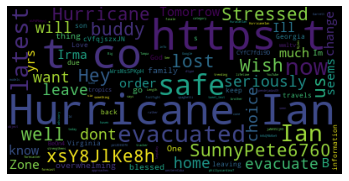

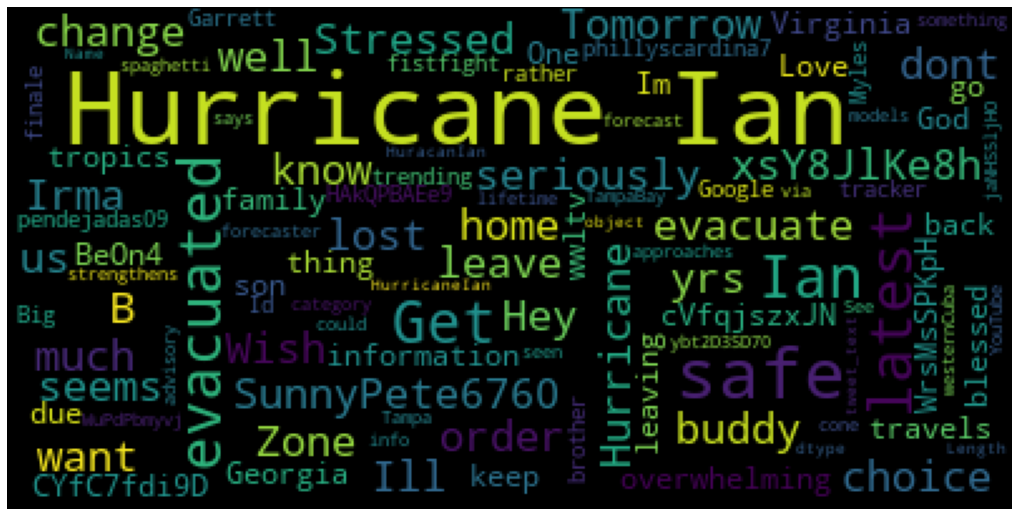

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(str(original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')))
more_stopwords = set(('cant', 'aint', 'today', 'https', 'co'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords

print()
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(original['tweet_text'].str.replace(r'[^a-zA-Z0-9]+', ' ')))
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")

### Action 7: Conduct sentiment analysis for the original tweet texts (select one method out of the four: Bing_liu, Pattern, Textblob, vaderSentiment)

In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
positive_count = 0
negative_count = 0
neutral_count  = 0
print(type(original['tweet_text']))

for row in original['tweet_text']:
    vsPol = analyzer.polarity_scores(row)
    #print("{:-<65} {}".format(row, str(vsPol)))
    Pol_result = vsPol['compound']
    if Pol_result >= 0.05:
        positive_count += 1
    elif -0.05 < Pol_result < 0.05:
        negative_count += 1
    else:
        neutral_count += 1
print("Number of positive reviews: {}".format(positive_count))
print("Number of negative reviews: {}".format(negative_count))
print("Number of neutural reviews: {}".format(neutral_count))

<class 'pandas.core.series.Series'>
Number of positive reviews: 65
Number of negative reviews: 80
Number of neutural reviews: 44
